# Segmenting plusplus 
We first import all needed packages.
You may need to change matplotlib backend, to see the animations. 

In [1]:
import skimage.io
import matplotlib.pyplot as plt
import simple_snake_new as sis
import numpy as np
%matplotlib qt

## Showing evolution
Iteratively (repetedly) displacing snake yields segmentation!

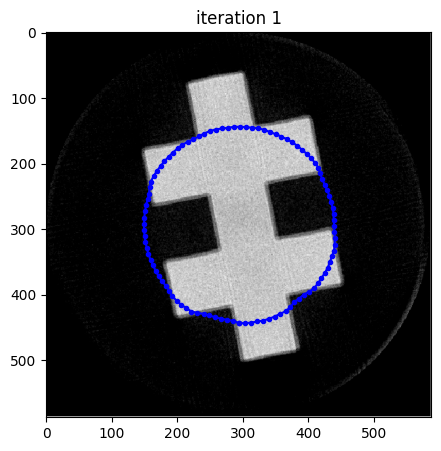

In [2]:
I = skimage.io.imread('../data/week6/plusplus.png')
I = I.mean(axis=2)  # Convert to grayscale

radius = min(I.shape)/4
center = ( I.shape[0]/2, I.shape[1]/2 )

N = 100

step_size = 0.0001
plot_pause = 0.01
alpha = 0.001
beta = 0.001

snake = sis.make_circular_snake(N, center, radius)
B = sis.regularization_matrix(N, alpha, beta)

fig, ax = plt.subplots(figsize=(5, 5))

closed = np.hstack([np.arange(N), 0])  # Indices of the closed curve

for i in range(100):
    
    snake = sis.evolve_snake(snake, I, B, step_size)

    ax.clear()
    ax.imshow(I, cmap='gray')    
    ax.plot(snake[closed, 1],snake[closed, 0], 'b.-')
    ax.set_title(f'iteration {i+1}')
    fig.canvas.draw()
    plt.pause(plot_pause)
  
plt.show()


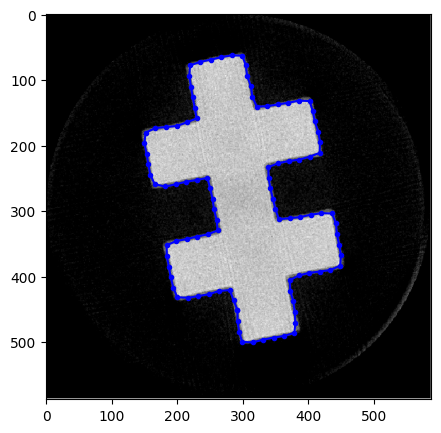

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(I, cmap='gray')
ax.plot(snake[closed, 1], snake[closed, 0], 'b.-')
plt.show()